In [1]:
# Styling notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("rise.css", "r").read()
    return HTML(styles)
css_styling()

<div style="font-size:2em; text-align:center; margin-top:30px; margin-bottom:20px">Data Science Academy 7</div>
<hr>
<br>

<div style="font-size:4em; text-align:center; margin-bottom:30px; color:#00746E"><b>ARIMA Univariate</b></div>

In [17]:
# evaluate an ARIMA model using a walk-forward validation
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [18]:
# Load dataset
df = read_csv('../input/demand_store_forecast/train.csv')
df = df[(df['store'] == 1) & (df['item'] == 1)] # item 1 in store 1
df = df.set_index('date')
df.index = pd.DatetimeIndex(df.index).to_period('D')
y = df['sales']
y_to_train = y.iloc[:(len(y)-365)]
y_to_test = y.iloc[(len(y)-365):] # last year for testing

## Walk forward validation

In [20]:
predictions = list()
history = [x for x in y_to_train]
# walk-forward validation
for t in range(len(y_to_test)):
	model = ARIMA(y_to_train, order=(1,1,0), freq= 'D')
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = y_to_test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=18.266634, expected=19.000000
predicted=18.266634, expected=15.000000
predicted=18.266634, expected=10.000000
predicted=18.266634, expected=16.000000
predicted=18.266634, expected=14.000000
predicted=18.266634, expected=24.000000
predicted=18.266634, expected=14.000000
predicted=18.266634, expected=20.000000
predicted=18.266634, expected=18.000000
predicted=18.266634, expected=11.000000
predicted=18.266634, expected=14.000000
predicted=18.266634, expected=17.000000
predicted=18.266634, expected=7.000000
predicted=18.266634, expected=16.000000
predicted=18.266634, expected=29.000000
predicted=18.266634, expected=15.000000
predicted=18.266634, expected=14.000000
predicted=18.266634, expected=10.000000
predicted=18.266634, expected=16.000000
predicted=18.266634, expected=22.000000
predicted=18.266634, expected=13.000000
predicted=18.266634, expected=21.000000
predicted=18.266634, expected=9.000000
predicted=18.266634, expected=18.000000
predicted=18.266634, expected=14.000000
pr

In [23]:
y_to_test

date
2017-01-01    19
2017-01-02    15
2017-01-03    10
2017-01-04    16
2017-01-05    14
              ..
2017-12-27    14
2017-12-28    19
2017-12-29    15
2017-12-30    27
2017-12-31    23
Freq: D, Name: sales, Length: 365, dtype: int64

Test RMSE: 7.972


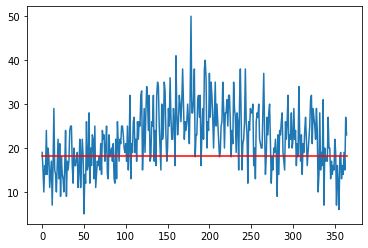

In [26]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(y_to_test.values, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(y_to_test.values)
pyplot.plot(predictions, color='red')
pyplot.show()